In [51]:
import Pkg; Pkg.add("PyPlot")
using LinearAlgebra
using Plots

   Resolving package versions...
  No Changes to `C:\Users\peakp\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\peakp\.julia\environments\v1.11\Manifest.toml`


# *Case 1*

In [52]:
x = 1/49
print(x)

0.02040816326530612

In [53]:
x = x * 49
print(x)

0.9999999999999999

In [54]:
Approx = x
TrueValue = 1

1

In [55]:
Et = TrueValue - Approx
println("True Error = $Et")
println("True Relative Error = $((Et/TrueValue) * 100)")

True Error = 1.1102230246251565e-16
True Relative Error = 1.1102230246251565e-14


# *Case 2*

In [56]:
a = 0.1
b = a + a + a
println(b == 0.3)

In [57]:
TrueValue = 0.3
Approx = b 
Et = TrueValue - Approx
println("True Error = $Et")
println("True Relative Error = $(abs((Et/TrueValue)) * 100)")

false
True Error = -5.551115123125783e-17
True Relative Error = 1.8503717077085944e-14


In [58]:
large_number = 1e8
small_increment = 1e-8
n_steps = 1000

theoretical = large_number .+ (1 :n_steps) .* small_increment
actual = fill(large_number, n_steps)
for i in 2:n_steps
    actual[i] = actual[i - 1] + small_increment
end

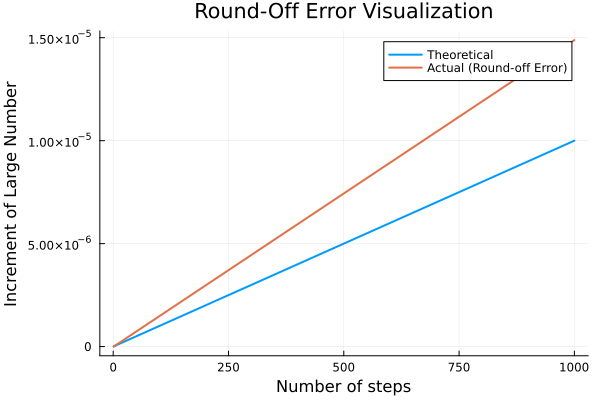

attempt to save state beyond implementation limit


In [59]:
using Plots

plot(1:n_steps, theoretical .- large_number, label="Theoretical", 
    xlabel="Number of steps", ylabel="Increment of Large Number", 
    title="Round-Off Error Visualization", linewidth=2, legend=:topright, grid=true)

plot!(1:n_steps, actual .- large_number, label="Actual (Round-off Error)", linewidth=2)

In [60]:
plot(1:n_steps+1, theoretical .- actual, label = "True Error", xlabel="Number of stps", ylabel="Increment from Large Number", title = "True Error Visualization", linewidth=2, legend=:topright,gird=true)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [61]:
plot(1:n_steps+1, abs.((theoretical.-actual)./theoretical) .*100, label = "True Error", xlabel="Number of stps", ylabel="Increment from Large Number", title = "True Error Visualization", linewidth=2, legend=:topright,grid=true)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [62]:
function factorial(x)
    value = 1
    for i in 1:x
        value *= i
    end
    return value
end

factorial (generic function with 1 method)

In [63]:
function taylor_exp(x, n_terms)
    approximation = zeros(size(x))
    for n in 0:n_terms
        approximation .= approximation .+ (x .^ n) ./ factorial(n)
    end
    return approximation
end

taylor_exp (generic function with 1 method)

In [66]:
using Plots
x = LinRange(0, 2, 100)
exact = exp.(x)
n_terms_list = [1, 2, 5, 100]


p = plot(x, exact, label="Exact e^x", title="Truncation Error in Taylor Series Approximation", xlabel="x", ylabel="e^x", linewidth=2, grid=true)
for n_terms in n_terms_list
    approx = taylor_exp(x, n_terms)
    plot!(p, x, approx, label = "$n_terms terms", linewidth=2)
end
